In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

%matplotlib inline
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

import warnings 
warnings.filterwarnings("ignore")

文件1为二手房，0为商品房

In [19]:
sc_price_index_files = glob("../datas/*/*_1.csv")
print(sc_price_index_files)
pd.read_csv(sc_price_index_files[0]).head(3)

['../datas\\m4\\april_1.csv', '../datas\\m5\\may_1.csv', '../datas\\m6\\june_1.csv', '../datas\\m7\\july_1.csv']


,城市,环比,同比,1-4月平均,城市.1,环比.1,同比.1,1-4月平均.1
0,上月=100,上年同月=100,上年同期=100,上月=100,上年同月=100,上年同期=100,NaN,NaN
1,北 京,98.4,92.0,94.1,唐 山,99.1,92.3,93.5
2,天 津,98.7,95.0,96.5,秦 皇 岛,99.0,93.0,94.2


In [22]:
df = pd.DataFrame([], columns=['城市', '环比', '同比', '1-n月平均'])
for sc_price_index_file in sc_price_index_files:
    df_temp = pd.read_csv(sc_price_index_file).iloc[1:, :]
    df_temp_1 = df_temp.iloc[:, :4].values
    df_temp_2 = df_temp.iloc[:, 4:].values
    df_temp_new = np.vstack((df_temp_1, df_temp_2))
    df = pd.merge(df, pd.DataFrame(df_temp_new, columns=['城市', f'{sc_price_index_file[10]}月环比', f'{sc_price_index_file[10]}月同比', f'1-{sc_price_index_file[10]}月平均']), on=['城市'], how="outer")

In [34]:
df_use = df.iloc[:, 3:]
df_use.head(3)

,城市,4月环比,4月同比,1-4月平均,5月环比,5月同比,1-5月平均,6月环比,6月同比,1-6月平均,7月环比,7月同比,1-7月平均
0,北 京,98.4,92.0,94.1,98.8,91.4,93.6,100.2,92.2,93.3,100.0,92.8,93.3
1,天 津,98.7,95.0,96.5,98.9,93.8,96.0,99.6,93.6,95.6,99.2,93.2,95.2
2,石 家 庄,99.4,96.7,97.4,98.9,95.8,97.1,98.9,95.0,96.7,99.7,94.7,96.4


城市间对比，非趋势图

In [ ]:
for col in df_use.columns[1:]:
    df_use[col] = df_use[col].astype(float)
df_use.info()

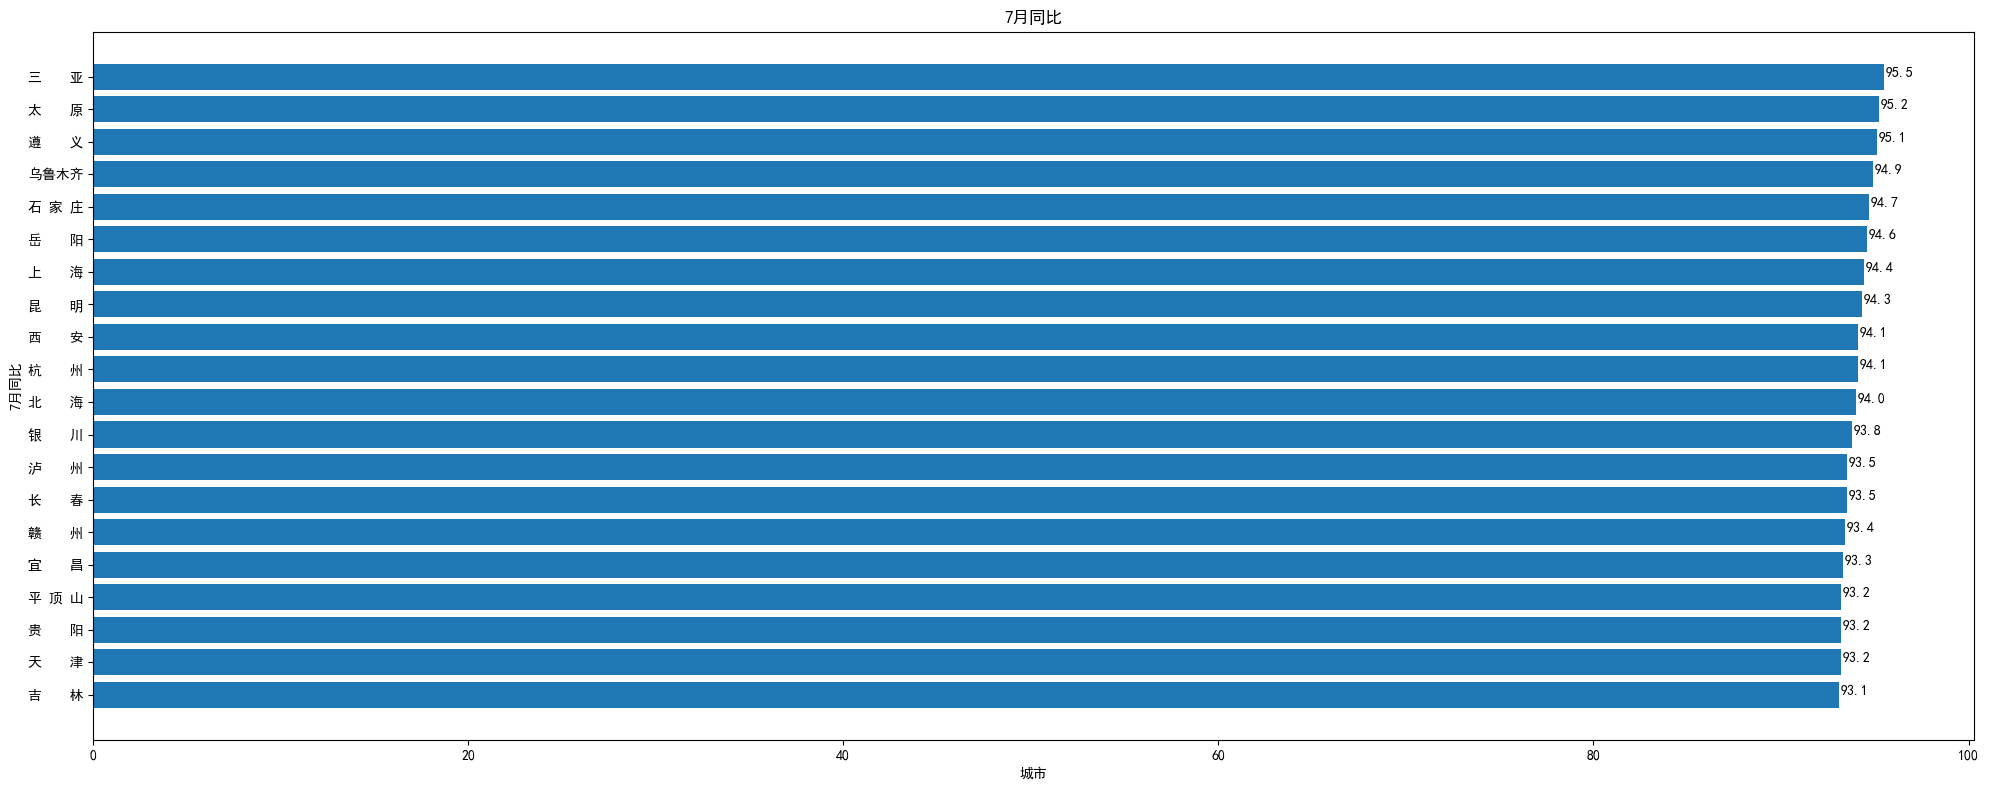

In [56]:
def plotPrice(month=4, name='环比'):
    df_sorted = df_use.sort_values(by=f'{month}月{name}', ascending=True).iloc[-20:, :]
    
    # 绘制柱状图  
    plt.figure(figsize=(20, 8))  # 设置图形大小  
    plt.barh(df_sorted['城市'], df_sorted[f'{month}月{name}'])  # 绘制柱状图  , color='skyblue'
    
    # 设置图形标题和坐标轴标签  
    plt.title(f'{month}月{name}')  
    plt.xlabel('城市')  
    plt.ylabel(f'{month}月{name}')  
    
    # 显示图形  
    plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域  

    # 添加数值标签
    for i, v in enumerate(df_sorted[f'{month}月{name}']):
        plt.text(float(v) + 0.1, i, str(v), color='black')
        
    plt.show()

plotPrice(7, '同比')